# Tutorial: GebPy
## Sedimentary Basin - Seismology

In [30]:
import os, sys
currentdir = os.path.dirname(os.path.realpath("Tutorial_Sedimentary-Basin_Seismology.ipynb"))
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

# MODULES
import random as rd
import numpy as np
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt
from modules import sequences, geophysics
from pandas.plotting import scatter_matrix
import seaborn as sn

### Simple generation of lithological data

In [57]:
data = sequences.SedimentaryBasin()
data_sedbasin = data.create_sedimentary_basin(maximum_thickness=500, n_units=15)

z = geophysics.Seismology().calculate_impedance(data_all=data_sedbasin)
        
r = geophysics.Seismology().calculate_reflection_coefficient(impedance=z)

500 500


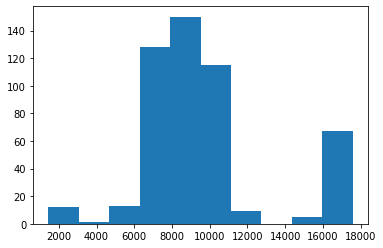

In [58]:
print(len(z), len(r))
plt.hist(z)
plt.show()

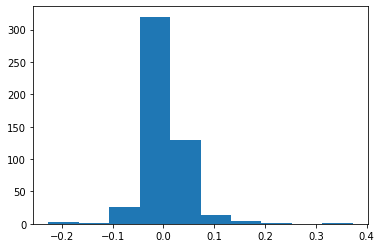

In [59]:
plt.hist(r)
plt.show()

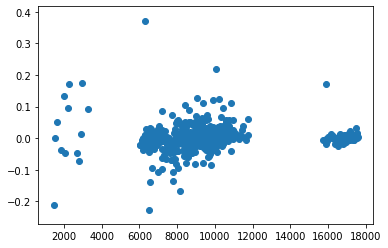

In [60]:
plt.scatter(z, r)
plt.show()

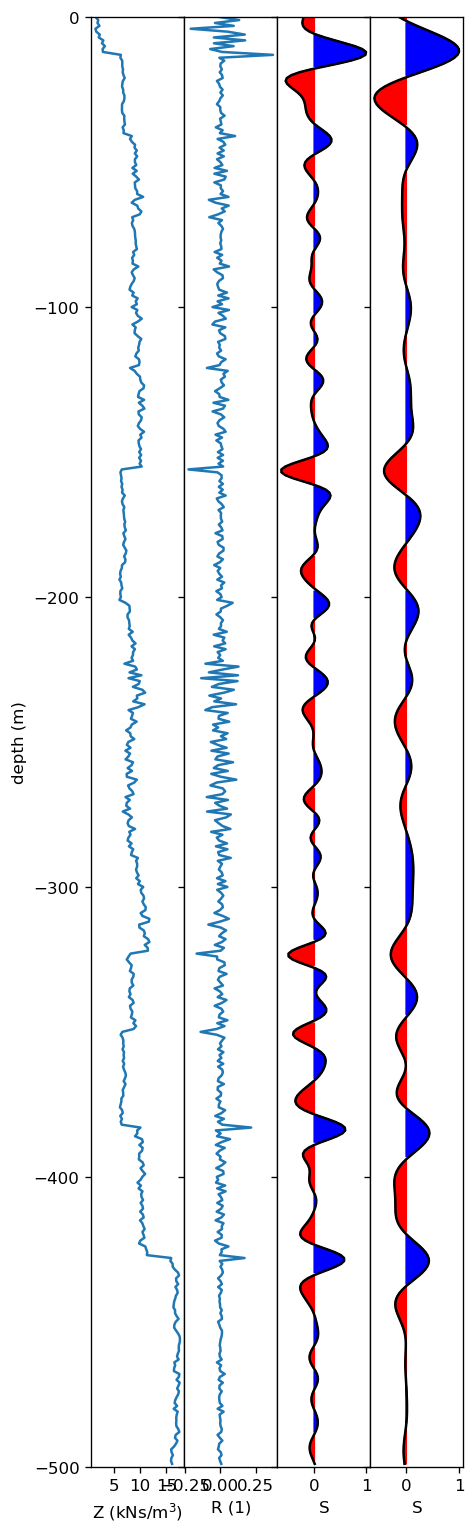

In [108]:
depth = np.arange(0, 500)

points = len(depth)
a = points/100
wavelet = signal.ricker(points, a)
filtered = signal.convolve(r, wavelet, mode="same")

def ricker(f, length=0.128, dt=0.001):
    t = np.arange(-length/2, (length-dt)/2, dt)
    y = (1.0 - 2.0*(np.pi**2)*(f**2)*(t**2)) * np.exp(-(np.pi**2)*(f**2)*(t**2))
    return t, y
 
f = 25 # A low wavelength of 25 Hz
t, w = ricker(f)
filtered_2 = signal.convolve(r, w, mode="same")/sum(w)

fig, ax = plt.subplots(1, 4, figsize=(4, 16), dpi=120, sharey=True, gridspec_kw={'wspace': 0})
#fig.subplots_adjust(wspace=0.8)
ax[0].plot(z/1000, -depth)
ax[0].set_xlabel("Z (kNs/m$^3$)")
ax[0].set_ylabel("depth (m)")
ax[1].plot(r, -depth)
ax[1].set_xlabel("R (1)")
#ax[1].set_ylabel("depth (m)")
ax[2].plot(filtered/max(filtered), -depth, color="black")
ax[2].fill_betweenx(-depth, 0.0, filtered/max(filtered), where=(filtered/max(filtered)>0.0), color="blue")
ax[2].fill_betweenx(-depth, 0.0, filtered/max(filtered), where=(filtered/max(filtered)<0.0), color="red")
ax[2].set_xlabel("S")
#ax[2].set_ylabel("depth (m)")
ax[3].plot(filtered_2/max(filtered_2), -depth, color="black")
ax[3].fill_betweenx(-depth, 0.0, filtered_2/max(filtered_2), where=(filtered_2/max(filtered_2)>0.0), color="blue")
ax[3].fill_betweenx(-depth, 0.0, filtered_2/max(filtered_2), where=(filtered_2/max(filtered_2)<0.0), color="red")
ax[3].set_xlabel("S")
plt.ylim(-500, 0)
plt.show()